**Pair - Modulo 3 - Leccion 10 - Estadistica Descriptiva II - 1 diciembre 2025**

In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Vincular funciones del .py que nos mando Cesar (carpeta src -> soporte_correlacion)
from src import soporte_correlacion as sp_corr

In [3]:
df = pd.read_csv("archivos/world_data_full_apply_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


### **Ejercicios estadística descriptiva**

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos ejercicios. EImagina que eres un analista de datos que trabaja para una organización internacional enfocada en el desarrollo y el bienestar de los países. Tu objetivo es realizar un **primer análisis descriptivo**, centrándote en:

* Cómo se distribuyen algunas **variables categóricas** entre los países (continente, idioma, etc.).
* Qué relaciones básicas podemos ver entre esas categorías.
* Y, al final, explorar **una correlación numérica concreta** relacionada con el desarrollo (fertilidad y esperanza de vida).

#### 1. Distribución de países por continente (variable categórica)

Variable categórica: `continent`

1. Calcula la **tabla de frecuencias** de `continent`:
   * Frecuencia absoluta (número de países por continente).
   * Frecuencia relativa o porcentaje sobre el total.

In [5]:
# Frecuencia relativa
round(df['continent'].value_counts(normalize=True, dropna=False)*100,2)

continent
Africa             27.18
Europe             24.10
Asia               23.08
Central America    10.26
Oceania             7.18
South America       6.67
North America       1.03
NaN                 0.51
Name: proportion, dtype: float64

In [ ]:
# Frecuencia absoluta
df['continent'].value_counts(normalize=False, dropna=False)

continent
Africa             53
Europe             47
Asia               45
Central America    20
Oceania            14
South America      13
North America       2
NaN                 1
Name: count, dtype: int64

2. Interpreta:
   * ¿Qué continente tiene más países en el dataset?
   * ¿Qué continentes están menos representados?
   * Desde el punto de vista de un analista, ¿por qué es importante conocer esta distribución antes de comparar indicadores entre continentes?

In [ ]:
# Africa
# North America
# Tenemos una mejor vision de los continentes (alto/bajo en paises) y se puede contextualizar lo demas.

#### 2. Idioma oficial: ¿qué idiomas son más frecuentes?

Variable categórica: `official_language`

1. Calcula la **frecuencia absoluta y relativa** de `official_language`.

In [8]:
# Frecuencia relativa
round(df['official_language'].value_counts(normalize=True, dropna=False)*100,2)

official_language
English              15.90
French               12.82
Spanish               9.74
Arabic                9.23
Portuguese            3.59
                     ...  
Tuvaluan Language     0.51
Ukrainian             0.51
Uzbek                 0.51
Vietnamese            0.51
Shona                 0.51
Name: proportion, Length: 77, dtype: float64

In [9]:
# Frecuencia absoluta
df['official_language'].value_counts(normalize=False, dropna=False)

official_language
English              31
French               25
Spanish              19
Arabic               18
Portuguese            7
                     ..
Tuvaluan Language     1
Ukrainian             1
Uzbek                 1
Vietnamese            1
Shona                 1
Name: count, Length: 77, dtype: int64

2. Identifica:
   * Los 5 idiomas oficiales más frecuentes.

In [15]:
round(df['official_language'].value_counts(normalize=True, dropna=False)*100,2).sort_values(ascending=False).head(5)

official_language
English       15.90
French        12.82
Spanish        9.74
Arabic         9.23
Portuguese     3.59
Name: proportion, dtype: float64

In [16]:
df['official_language'].value_counts(normalize=False, dropna=False).sort_values(ascending=False).head(5)

official_language
English       31
French        25
Spanish       19
Arabic        18
Portuguese     7
Name: count, dtype: int64

In [ ]:
# FAIL: top_5 = df['official_language'].value_counts(normalize=False, dropna=False).sort_values(ascending=False).head(5)

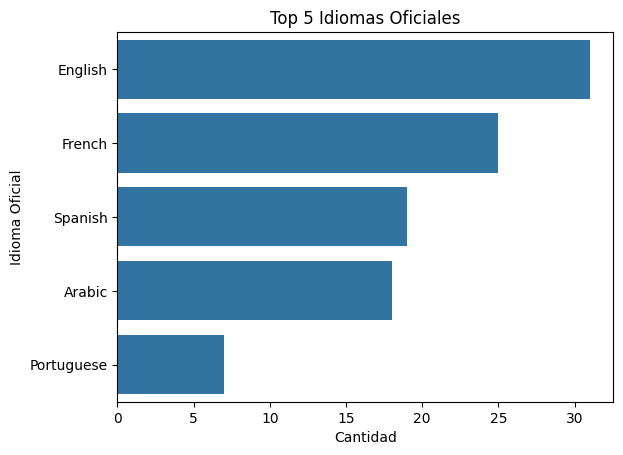

In [ ]:
# Top 5 valores de la columna
top_5 = df['official_language'].value_counts().head(5)

# Crear un DataFrame desde el top 5
top_5_df = top_5.reset_index()              # para hacerlo un dataframe**
top_5_df.columns = ['official_language', 'count']

# Graficar  BARPLOT
sns.barplot(data=top_5_df, y='official_language', x='count')
plt.title("Top 5 Idiomas Oficiales")
plt.xlabel("Cantidad")
plt.ylabel("Idioma Oficial")
plt.show()

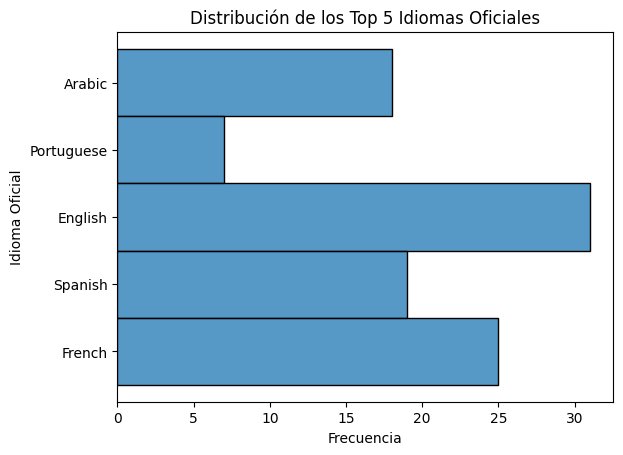

In [29]:
# HISTPLOT version
# Filtrar el DataFrame original para incluir solo los top 5 idiomas
top_5_languages = top_5.index.tolist()
filtered_df = df[df['official_language'].isin(top_5_languages)]

# Graficar con histplot
sns.histplot(data=filtered_df, y='official_language', discrete=True)
plt.title("Distribución de los Top 5 Idiomas Oficiales")
plt.xlabel("Frecuencia")
plt.ylabel("Idioma Oficial")
plt.show()


3. Interpreta:
   * ¿Hay algún idioma claramente dominante?
   * ¿Qué implicaciones podría tener esto a la hora de diseñar encuestas, campañas o informes internacionales?

In [ ]:
# No.
# Habria que dar varias opciones de idiomas para todo... 
# eligiendo por mercados (por ventas o lo que sea de importancia)

*(Si hay demasiadas categorías, puedes usar algo como `value_counts().head(10)` para ver solo las más frecuentes.)*

#### 3. Continente vs. nivel de ingresos

En esta base de datos tenemos `gdp` (Producto Interno Bruto per cápita aproximado). Crea primero una **variable categórica derivada** a partir de `gdp`, por ejemplo:

* `bajo`: países con `gdp` por debajo del percentil 33.
* `medio`: entre los percentiles 33 y 66.
* `alto`: por encima del percentil 66.

Puedes llamarla, por ejemplo, `gdp_level`.

1. Crea la nueva columna `gdp_level` en el DataFrame.

In [ ]:
pd.cut(df['level'], bins=3, labels=['bajo','medio', 'alto'])

0      bajo
1      bajo
2      bajo
3      bajo
4      bajo
       ... 
190    bajo
191    bajo
192    bajo
193    bajo
194    bajo
Name: gdp, Length: 195, dtype: category
Categories (3, object): ['bajo' < 'medio' < 'alto']

In [35]:
df['gdp_level'] = pd.qcut(df['gdp'], q=[0, 0.33, 0.66, 1], labels=['bajo', 'medio', 'alto'])

In [37]:
df['gdp_level']

0      medio
1      medio
2       alto
3       bajo
4       alto
       ...  
190     alto
191     alto
192    medio
193    medio
194    medio
Name: gdp_level, Length: 195, dtype: category
Categories (3, object): ['bajo' < 'medio' < 'alto']

In [36]:
df.sample(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,gdp_cat,gdp_level
27,Burundi,463.0,BI,79.2,27.830,31.0,39.01,257.0,Bujumbura,495.0,182.11,-0.7,BIF,5.41,10.9,1.21,3.012335e+09,121.4,6.1,41.0,Bujumbura,61.2,548.0,NaN,Kirundi,19.1,0.10,NaN,79.2,13.6,41.2,1.43,NaN,-3.373056,29.918886,Africa,bajo,bajo
33,Central African Republic,8.0,CF,8.2,622.984,8.0,35.35,236.0,Bangui,297.0,186.86,37.1,NaN,4.72,35.6,1.41,2.220307e+09,102.0,3.0,84.5,Bangui,52.8,829.0,0.37,French,39.6,0.06,NaN,72.0,8.6,73.3,3.68,NaN,6.611111,20.939444,Africa,bajo,bajo


2. Construye una **tabla de contingencia** entre:
   * Filas: `continent`
   * Columnas: `gdp_level`

In [39]:
pd.crosstab(df["continent"],df["gdp_level"])

gdp_level,bajo,medio,alto
continent,,,
Africa,25,20,8
Asia,7,17,20
Central America,11,6,3
Europe,7,15,24
North America,0,0,2
Oceania,11,1,2
South America,2,4,7


In [ ]:
# 0 = no hay paises en ese rango de % (ex: North America - Canada y EEUU estan arriba del 66%, 0 debajo)

3. Normaliza la tabla por filas (porcentaje dentro de cada continente).

In [ ]:
round(pd.crosstab(df["continent"],df["gdp_level"], normalize="index")*100,2)
# "index" = por filas 100%

gdp_level,bajo,medio,alto
continent,,,
Africa,47.17,37.74,15.09
Asia,15.91,38.64,45.45
Central America,55.00,30.00,15.00
Europe,15.22,32.61,52.17
North America,0.00,0.00,100.00
Oceania,78.57,7.14,14.29
South America,15.38,30.77,53.85


4. Interpreta:
   * ¿Qué continentes concentran más países en el grupo de `gdp` **alto**?
   * ¿Hay algún continente donde predominen claramente los países de `gdp` **bajo**?
   * ¿Qué conclusiones preliminares (no definitivas) podrías extraer sobre la distribución de riqueza por continente?

In [ ]:
Alto - North America, South America, Europe, Asia
Bajo - Oceania, Centro America, Africa
TBD

#### 4. Idioma oficial vs. continente

Queremos ver la relación entre **continente** e **idioma oficial**.

Variables categóricas:

* `continent`
* `official_language`

1. Crea una **tabla de contingencia**:
   * Filas: `continent`
   * Columnas: `official_language`

2. Normaliza por filas (`normalize="index"`) para obtener porcentajes.

3. Interpreta:
   * ¿Hay continentes donde uno o dos idiomas dominen claramente?
   * ¿En qué continente ves más diversidad de idiomas?
   * Desde el punto de vista de políticas internacionales, ¿por qué puede ser útil esta información?

*(Si la tabla es muy grande, puedes filtrar a los 5–10 idiomas más frecuentes antes de construirla.)*

#### 5. Fertilidad y esperanza de vida: correlación entre variables numéricas

Ahora pasamos a una relación entre dos **variables numéricas**:

* `fertility_rate`
* `life_expectancy`

1. Calcula el **coeficiente de correlación de Pearson** entre `fertility_rate` y `life_expectancy`.

2. Representa, si puedes, un **diagrama de dispersión (scatter plot)** de `fertility_rate` (eje X) vs. `life_expectancy` (eje Y).

3. Interpreta:
   * ¿La correlación es positiva o negativa? ¿Es fuerte, moderada o débil?
   * ¿Tiene sentido esta relación desde el punto de vista demográfico?
   * ¿Podrías explicar, en lenguaje de negocio/políticas públicas, qué significa “a mayor tasa de fertilidad, tiende a ocurrir X con la esperanza de vida”?

#### 6. Bonus: clasificación y resumen de mortalidad infantil (categorías a partir de numérica)

Variable numérica: `infant_mortality`

1. Crea una **variable categórica** a partir de `infant_mortality`, por ejemplo:

   * `baja` mortalidad infantil
   * `moderada`
   * `alta`

      (Puedes definir los cortes usando percentiles, o umbrales que tú elijas y documentes.)

2. Calcula la **tabla de frecuencias** de esta nueva variable categórica.

3. Crea una **tabla de contingencia** entre:
   * Filas: `continent`
   * Columnas: categoría de mortalidad infantil.

4. Interpreta:
   * ¿Qué continentes concentran más países con **alta** mortalidad infantil?
   * ¿Hay continentes donde predominan los países con **baja** mortalidad?
   * ¿Qué tipo de prioridades podría marcarse una organización internacional a partir de este análisis?

Recuerda siempre acompañar los cálculos con una **pequeña interpretación** como analista de datos: no solo “qué números salen”, sino **qué implican** sobre la situación de los países.